1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

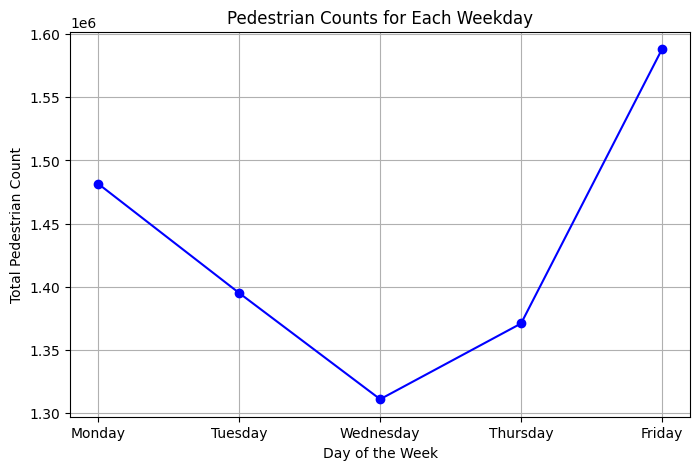

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert 'hour_beginning' to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the day of the week
df['Day_of_Week'] = df['hour_beginning'].dt.dayofweek  # Monday=0, Sunday=6

# Filter for weekdays (Monday to Friday → 0 to 4)
weekdays_df = df[df['Day_of_Week'] < 5]

# Group by Day of the Week and sum pedestrian counts
weekday_counts = weekdays_df.groupby('Day_of_Week')['Pedestrians'].sum()

# Map numeric days to actual weekday names
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Plot the line graph
plt.figure(figsize=(8,5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-', color='b')

# Customize plot
plt.title("Pedestrian Counts for Each Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Total Pedestrian Count")
plt.grid(True)

# Show the plot
plt.show()

Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert 'hour_beginning' to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format='%m/%d/%Y %I:%M:%S %p')

# Filter data for the year 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019]

# Display first few rows
df_2019.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [13]:
# Apply One-Hot Encoding to 'weather_summary'
df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'], drop_first=True)

# Display the first few rows after encoding
df_2019_encoded.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,events,Location1,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",False,False,False,False,False,False,False,False,False
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",False,True,False,False,False,False,False,False,False
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",False,True,False,False,False,False,False,False,False
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",False,True,False,False,False,False,False,False,False
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",True,False,False,False,False,False,False,False,False


In [16]:
# Drop non-numeric columns
df_numeric = df_2019_encoded.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Display only the correlation of 'Pedestrians' with weather conditions
pedestrian_corr = corr_matrix[['Pedestrians']]

# Display correlation values
print(pedestrian_corr)

                   Pedestrians
Pedestrians           1.000000
Towards Manhattan     0.989069
Towards Brooklyn      0.991341
temperature           0.358757
precipitation        -0.105432
lat                        NaN
long                       NaN


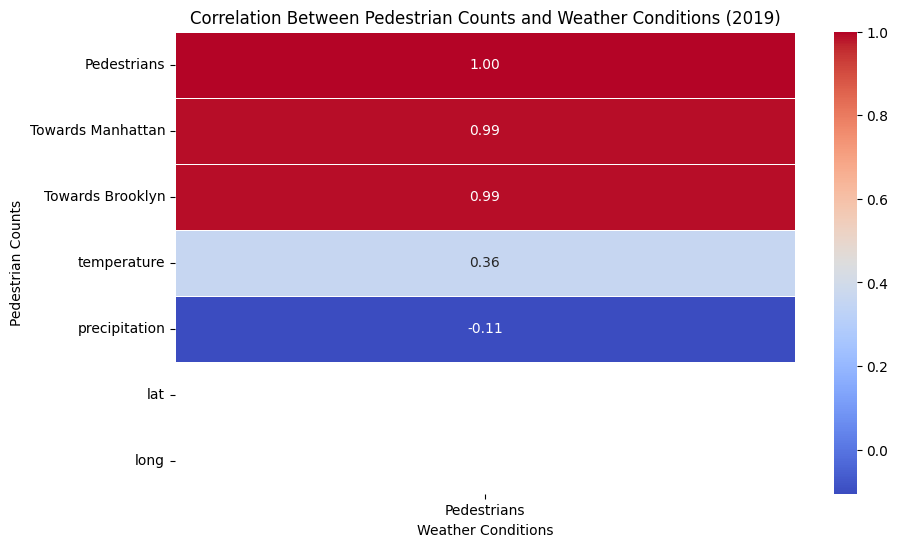

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap for correlations with 'Pedestrians'
sns.heatmap(pedestrian_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and labels
plt.title("Correlation Between Pedestrian Counts and Weather Conditions (2019)")
plt.xlabel("Weather Conditions")
plt.ylabel("Pedestrian Counts")

# Show the plot
plt.show()

3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert 'hour_beginning' to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the hour from 'hour_beginning'
df['hour'] = df['hour_beginning'].dt.hour

# Define a function to categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['time_of_day'] = df['hour'].apply(categorize_time)

# Display the first few rows to verify
print(df[['hour_beginning', 'hour', 'time_of_day']].head())

       hour_beginning  hour time_of_day
0 2019-04-30 00:00:00     0       Night
1 2019-12-31 22:00:00    22       Night
2 2019-12-31 23:00:00    23       Night
3 2019-12-31 21:00:00    21       Night
4 2019-04-01 03:00:00     3       Night


In [19]:
# Group data by 'time_of_day' and sum pedestrian counts
time_of_day_activity = df.groupby('time_of_day')['Pedestrians'].sum()

# Print the pedestrian count by time of day
print(time_of_day_activity)

time_of_day
Afternoon    5852025
Evening      2432145
Morning      2480582
Night         268114
Name: Pedestrians, dtype: int64


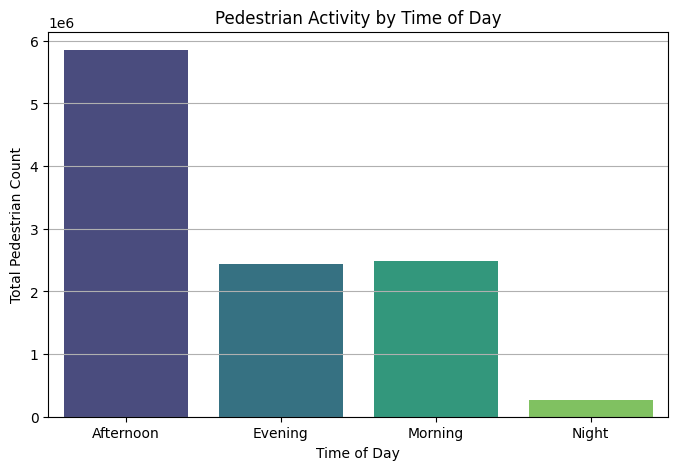

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert 'hour_beginning' to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the hour from 'hour_beginning'
df['hour'] = df['hour_beginning'].dt.hour

# Define a function to categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply function to create a new column
df['time_of_day'] = df['hour'].apply(categorize_time)

# Group data by 'time_of_day' and sum pedestrian counts
time_of_day_activity = df.groupby('time_of_day')['Pedestrians'].sum()

# Set figure size
plt.figure(figsize=(8,5))

# Fix FutureWarning issue in seaborn
sns.barplot(x=time_of_day_activity.index, y=time_of_day_activity.values, hue=time_of_day_activity.index, palette="viridis", legend=False)

# Customize plot
plt.title("Pedestrian Activity by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Pedestrian Count")
plt.grid(axis="y")

# Show the plot
plt.show()